In [23]:
#Data Handling Library
import os
import pandas as pd #Data processing
import numpy as np #Linear Algebra

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Boxify Dataset.csv')

In [25]:
df.head()

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97
3,6,Historical,115883,1.0,1.0,D,4,1,334011.0,100.00,2006,20,133.93,83.15
4,7,Historical,863939,1.0,1.0,D,2,1,1287938.0,121.95,2010,28,4.00,23.99


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198917 entries, 0 to 198916
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order             198917 non-null  int64  
 1   File_Type         198917 non-null  object 
 2   SKU_number        198917 non-null  int64  
 3   SoldFlag          75996 non-null   float64
 4   SoldCount         75996 non-null   float64
 5   MarketingType     198917 non-null  object 
 6   ReleaseNumber     198917 non-null  int64  
 7   New_Release_Flag  198917 non-null  int64  
 8   StrengthFactor    198917 non-null  float64
 9   PriceReg          198917 non-null  float64
 10  ReleaseYear       198917 non-null  int64  
 11  ItemCount         198917 non-null  int64  
 12  LowUserPrice      198917 non-null  float64
 13  LowNetPrice       198917 non-null  float64
dtypes: float64(6), int64(6), object(2)
memory usage: 21.2+ MB


In [27]:
df.describe()

,Order,SKU_number,SoldFlag,SoldCount,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
count,198917.000000,1.989170e+05,75996.000000,75996.000000,198917.000000,198917.000000,1.989170e+05,198917.000000,198917.000000,198917.000000,198917.000000,198917.000000
mean,106483.543242,8.613626e+05,0.171009,0.322306,3.412202,0.642248,1.117115e+06,90.895243,2006.016414,41.426283,30.982487,46.832053
std,60136.716784,8.699794e+05,0.376519,1.168615,3.864243,0.479340,1.522090e+06,86.736367,9.158331,37.541215,69.066155,128.513236
min,2.000000,5.000100e+04,0.000000,0.000000,0.000000,0.000000,6.275000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55665.000000,2.172520e+05,0.000000,0.000000,1.000000,0.000000,1.614188e+05,42.000000,2003.000000,21.000000,4.910000,17.950000
50%,108569.000000,6.122080e+05,0.000000,0.000000,2.000000,1.000000,5.822240e+05,69.950000,2007.000000,32.000000,16.080000,33.980000
75%,158298.000000,9.047510e+05,0.000000,0.000000,5.000000,1.000000,1.430083e+06,116.000000,2011.000000,50.000000,40.240000,55.490000
max,208027.000000,3.960788e+06,1.000000,73.000000,99.000000,1.000000,1.738445e+07,12671.480000,2018.000000,2542.000000,14140.210000,19138.790000


In [28]:
#Checking number of unique values per column
df.nunique()

Order               198917
File_Type                2
SKU_number          133360
SoldFlag                 2
SoldCount               37
MarketingType            2
ReleaseNumber           71
New_Release_Flag         2
StrengthFactor      197424
PriceReg             11627
ReleaseYear             85
ItemCount              501
LowUserPrice         12102
LowNetPrice          15403
dtype: int64

In [29]:
#Number of unique values, lets see why are there any in this file
#Checking the number of null values per column
df.isnull().sum()

Order                    0
File_Type                0
SKU_number               0
SoldFlag            122921
SoldCount           122921
MarketingType            0
ReleaseNumber            0
New_Release_Flag         0
StrengthFactor           0
PriceReg                 0
ReleaseYear              0
ItemCount                0
LowUserPrice             0
LowNetPrice              0
dtype: int64

In [30]:
#Handling the missing data 
df.fillna(method = "ffill", inplace = True)

In [31]:
#Identifying top 15 selling products and categories
top_products = df.groupby('SKU_number')['SoldCount'].sum().nlargest(15)
print('Top Selling Products:')
print(top_products)

Top Selling Products:
SKU_number
665269    73.0
613864    69.0
141848    51.0
254518    40.0
55769     36.0
767846    36.0
416609    35.0
243550    34.0
141824    33.0
747765    30.0
254192    28.0
540449    27.0
608089    27.0
860747    27.0
52194     26.0
Name: SoldCount, dtype: float64


In [32]:
#Investigating Stock levels and low stock items 
#For the items having counts less than 10 are considered as low stock items
Low_stock_items = df['ItemCount'] < 10
Low_stock_items = Low_stock_items.astype(int)#Converting boolean format into integer format
print('Low stock items(0 for False, 1 for True):')
print(Low_stock_items)

Low stock items(0 for False, 1 for True):
0         1
1         0
2         0
3         0
4         0
         ..
198912    0
198913    0
198914    0
198915    0
198916    0
Name: ItemCount, Length: 198917, dtype: int32


In [33]:
#Inventory Key Perfomance Insights
#Calculate KPI:- 
Inventory_turnover = df['SoldCount'].sum() / df['ItemCount'].sum()
Stock_to_sales_ratio = df['ItemCount'].sum() / df['SoldCount'].sum()
reorder_point = df['ItemCount'].mean()

print(Inventory_turnover)
print(Stock_to_sales_ratio)
print(reorder_point)

0.0029724314086028917
336.42492038866664
41.42628332420055


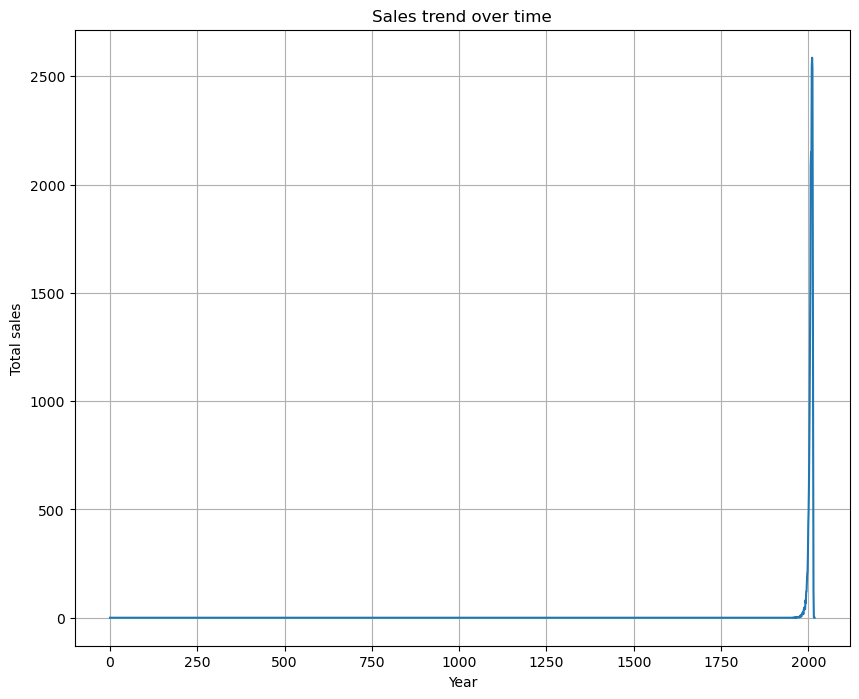

In [34]:
#Visualizing sales trend over time
plt.figure(figsize=(10, 8))
df.groupby('ReleaseYear')['SoldCount'].sum().plot(kind = 'line')
plt.xlabel('Year')
plt.ylabel('Total sales')
plt.title('Sales trend over time')
plt.grid(True)
plt.show()

In [35]:
''' 
As can be observed from the graph above, sales increased by a respectably large amount in the year 2000. 
However, sales data for the prior year is not available. 

'''

' \nAs can be observed from the graph above, sales increased by a respectably large amount in the year 2000. \nHowever, sales data for the prior year is not available. \n\n'

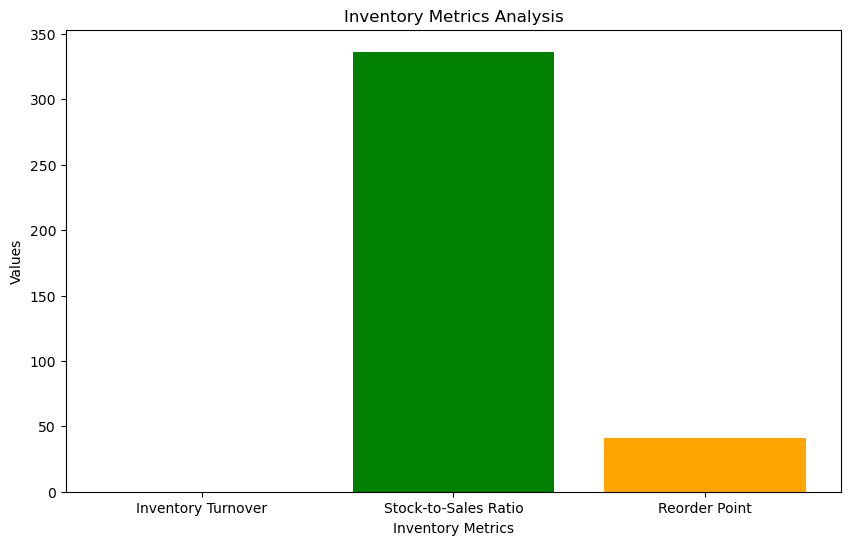

In [36]:
#Visualizing Inventory metrics
plt.figure(figsize=(10,6))
Inventory_metrics = ['Inventory Turnover', 'Stock-to-Sales Ratio', 'Reorder Point']
values =[Inventory_turnover, Stock_to_sales_ratio, reorder_point]
plt.bar(Inventory_metrics, values, color=['Blue', 'Green', 'Orange'])
plt.xlabel('Inventory Metrics')
plt.ylabel('Values')
plt.title('Inventory Metrics Analysis')
plt.show()

In [37]:
'''
From the above graph, we can conclude, that there is a poor turnover of the inventory as the goods are not sold rapidly whereas\n
there is rapid increase in stock to sales ratio as the inventory is more than the sales.\n
The ratio of reorder point is relatively low due to moderately high inventory levels.
'''

'\nFrom the above graph, we can conclude, that there is a poor turnover of the inventory as the goods are not sold rapidly whereas\n\nthere is rapid increase in stock to sales ratio as the inventory is more than the sales.\n\nThe ratio of reorder point is relatively low due to moderately high inventory levels.\n'

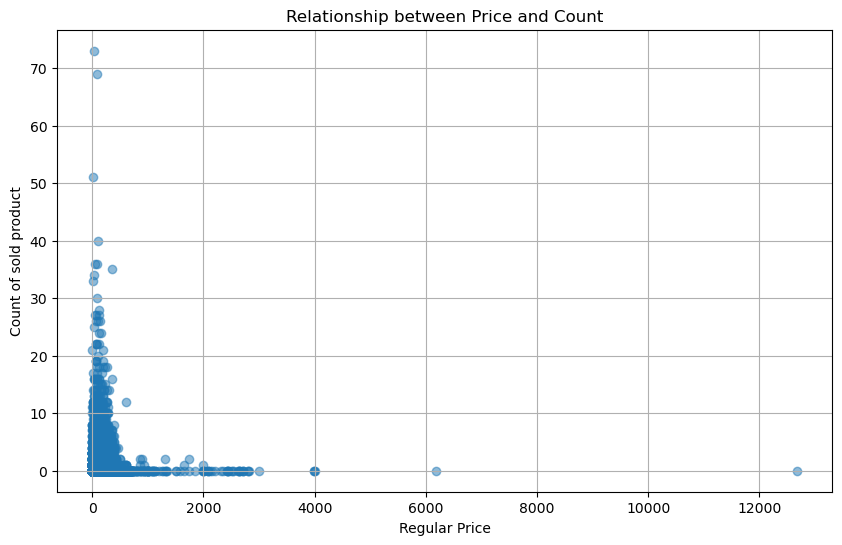

In [38]:
#Analyzing product performance
plt.figure(figsize=(10,6))
plt.scatter(df['PriceReg'], df['SoldCount'], alpha=0.5)
plt.xlabel('Regular Price')
plt.ylabel('Count of sold product')
plt.title('Relationship between Price and Count')
plt.grid(True)
plt.show()

In [39]:
#Observation
#From the above visualization we can conclude that with the increasing price the count of sold product is decreasing.
#A downward trend in sold count as the price increases would indicate price sensitivity, suggesting that higher prices may result in lower sales volume.

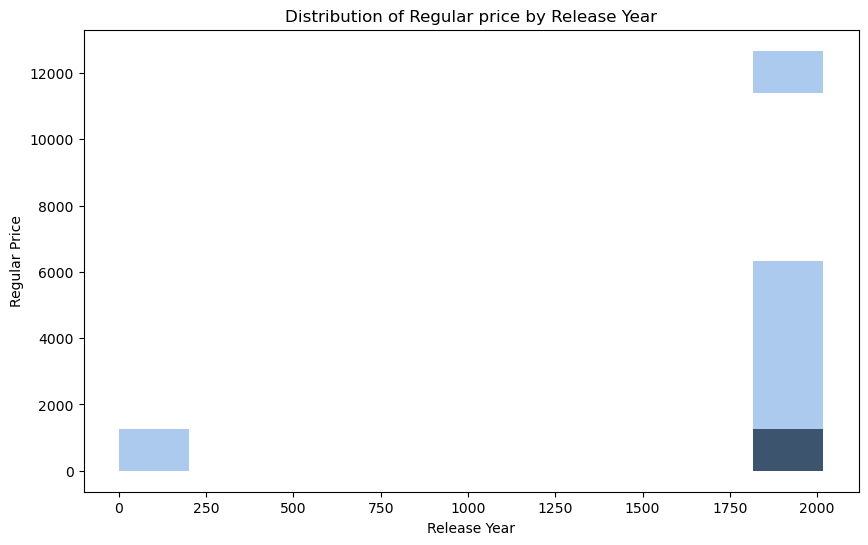

In [54]:
#Distribution of Price by Year
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ReleaseYear', y='PriceReg', bins=10, kde=True)
plt.title('Distribution of Regular price by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Regular Price')
plt.show()

In [1]:
from IPython.display import Markdown
#Summary of findings and insights
summary = """
## Summary of Findings:
### Data Overview:

The dataset contains information about product sales, including SKU numbers, sold counts, item counts, prices, and release years.
Initial exploration showed no missing values after filling them using forward fill method.
Top Selling Products:

Identified the top 15 selling products based on the sum of sold counts.
### Inventory Insights:

Investigated low stock items, considering items with counts less than 10 as low stock.
Calculated key performance indicators (KPIs) including Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point.
Sales Trends:

Visualized sales trends over time, showing a notable increase in sales in the year 2000.
### Inventory Metrics Analysis:

Analyzed Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point, indicating poor turnover, high stock-to-sales ratio, and moderate reorder point.
Product Performance:

Explored the relationship between price and sold counts, revealing a negative correlation, suggesting price sensitivity.
Price Distribution by Year:

Examined the distribution of regular prices by release year, providing insights into pricing trends over time.

## Inventory-Driven Insights and Recommendations:
### Inventory Optimization:

Utilize insights from low stock items to prioritize restocking efforts, ensuring that popular products are readily available to customers.
Optimize inventory levels based on the analysis of Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point. Adjust purchasing and stocking strategies to minimize excess inventory while meeting demand.
Sales Forecasting:

Use historical sales data to forecast future demand accurately. This can aid in maintaining optimal inventory levels, reducing stockouts, and avoiding overstock situations.
Price Sensitivity Analysis:

Continuously monitor the relationship between price and sold counts to understand customer behavior and price sensitivity. Adjust pricing strategies accordingly to maximize sales volume and revenue.
### Dynamic Pricing:

Implement dynamic pricing strategies based on demand fluctuations and market conditions. This can help in maximizing profitability while ensuring competitiveness in the market.
Seasonal Demand Planning:

Identify seasonal trends in sales and adjust inventory levels and marketing strategies accordingly. Anticipate demand fluctuations during peak seasons and align inventory management practices to meet customer needs efficiently.

## Business Benefits of Enhanced Inventory Management:
### Cost Efficiency:

Optimizing inventory levels can reduce holding costs associated with excess inventory while minimizing the risk of stockouts, thus improving cost efficiency.
Improved Customer Satisfaction:

Ensuring product availability through effective inventory management enhances customer satisfaction by reducing instances of out-of-stock items and fulfilling customer orders promptly.
Enhanced Profitability:

By accurately forecasting demand, businesses can minimize inventory-related costs and maximize sales revenue, leading to improved profitability.
Competitive Advantage:

Efficient inventory management allows businesses to respond swiftly to market changes, gain a competitive edge by offering a wider product selection, and maintain competitive pricing strategies.
Data-Driven Decision Making:

Leveraging data analytics for inventory management enables businesses to make informed decisions, optimize operations, and adapt to evolving market dynamics effectively.
In conclusion, implementing data-driven inventory management strategies based on thorough analysis can significantly enhance operational efficiency, customer satisfaction, and profitability for businesses across various industries.
"""

Markdown(summary)


## Summary of Findings:
### Data Overview:

The dataset contains information about product sales, including SKU numbers, sold counts, item counts, prices, and release years.
Initial exploration showed no missing values after filling them using forward fill method.
Top Selling Products:

Identified the top 15 selling products based on the sum of sold counts.
### Inventory Insights:

Investigated low stock items, considering items with counts less than 10 as low stock.
Calculated key performance indicators (KPIs) including Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point.
Sales Trends:

Visualized sales trends over time, showing a notable increase in sales in the year 2000.
### Inventory Metrics Analysis:

Analyzed Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point, indicating poor turnover, high stock-to-sales ratio, and moderate reorder point.
Product Performance:

Explored the relationship between price and sold counts, revealing a negative correlation, suggesting price sensitivity.
Price Distribution by Year:

Examined the distribution of regular prices by release year, providing insights into pricing trends over time.

## Inventory-Driven Insights and Recommendations:
### Inventory Optimization:

Utilize insights from low stock items to prioritize restocking efforts, ensuring that popular products are readily available to customers.
Optimize inventory levels based on the analysis of Inventory Turnover, Stock-to-Sales Ratio, and Reorder Point. Adjust purchasing and stocking strategies to minimize excess inventory while meeting demand.
Sales Forecasting:

Use historical sales data to forecast future demand accurately. This can aid in maintaining optimal inventory levels, reducing stockouts, and avoiding overstock situations.
Price Sensitivity Analysis:

Continuously monitor the relationship between price and sold counts to understand customer behavior and price sensitivity. Adjust pricing strategies accordingly to maximize sales volume and revenue.
### Dynamic Pricing:

Implement dynamic pricing strategies based on demand fluctuations and market conditions. This can help in maximizing profitability while ensuring competitiveness in the market.
Seasonal Demand Planning:

Identify seasonal trends in sales and adjust inventory levels and marketing strategies accordingly. Anticipate demand fluctuations during peak seasons and align inventory management practices to meet customer needs efficiently.

## Business Benefits of Enhanced Inventory Management:
### Cost Efficiency:

Optimizing inventory levels can reduce holding costs associated with excess inventory while minimizing the risk of stockouts, thus improving cost efficiency.
Improved Customer Satisfaction:

Ensuring product availability through effective inventory management enhances customer satisfaction by reducing instances of out-of-stock items and fulfilling customer orders promptly.
Enhanced Profitability:

By accurately forecasting demand, businesses can minimize inventory-related costs and maximize sales revenue, leading to improved profitability.
Competitive Advantage:

Efficient inventory management allows businesses to respond swiftly to market changes, gain a competitive edge by offering a wider product selection, and maintain competitive pricing strategies.
Data-Driven Decision Making:

Leveraging data analytics for inventory management enables businesses to make informed decisions, optimize operations, and adapt to evolving market dynamics effectively.
In conclusion, implementing data-driven inventory management strategies based on thorough analysis can significantly enhance operational efficiency, customer satisfaction, and profitability for businesses across various industries.
